## RLab5 on Bagging and Random Forest

Random forest is an ensemble-based method that uses multiple decision trees constructed via bagging (bootstrapped aggregating) with random feature selection. Due to random selection of a subset of all features in tree-growing, it can handle large, noisy, or even missing data. In our weekly meeting, we used **ranger** package for the random forest analysis.  Since this package is not available in Coursera shell, we will use **randomForest** package. A sample code with this package was provided in lecture slides. 

## OFP - Visits to Physician Office Data

Our data set contains the following variables:

**Predictors**

1.	**ofp**:  number of physician office visits
2.	**ofnpv**:  number of nonphysician office visits
3.	**opp**:  number of physician outpatient visits
4.	**opnp**:  number of nonphysician outpatient visits
5.	**emr**:  number of emergency room visits 
6.  **hosp**  number of hospitalizations 
7.	**numchron**: number of chronic conditions
8.	**adldiff**:  the person has a condition that limits activities of daily living ?
9.	**age**:  age in years (divided by 10)
10.	**black**:  is the person african–american ?
11.	**sex**: is the person male ?
12.	**married**:  is the person married ?
13.	**school**:  number of years of education 
14.	**faminc**:  family income in $10000 
15.	**employed**:  is the person employed ?
16.	**privins**:  is the person covered by private health insurance ?
17.	**medicaid**:  is the person covered by medicaid ?
18.	**region**:  the region (noreast, midwest,west)

**Target Variable**
- **hlth**:  self-perceived health (excellent, poor, other)


There are 4406 observations and 18 predictors in our dataset to predict our outcome variable **hlth**



In [1]:
# Call the necessary packages
library(dplyr)
library(rpart)
library(ipred)
library(caret)
library(ggplot2)
library(randomForest)
library(knitr)
library(testthat)

# read the csv file in R and name it as OFP_data

OFP_data<-read.csv("OFB.csv", head=TRUE)

# split data into training and testing sets, keep 30% of the data for validation
set.seed(4230) #set the seed function
index_data <- createDataPartition(OFP_data$hlth, p = 0.7,
list = FALSE)
OFP_train <- OFP_data[index_data, ]
OFP_test <- OFP_data[-index_data, ]
# check the data structure 
print(str(OFP_data))

print(table(OFP_train$hlth))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice

Loading required package: ggplot2

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches




'data.frame':	4406 obs. of  19 variables:
 $ ofp     : int  13 16 17 1 12 6 5 4 8 13 ...
 $ ofnp    : int  0 0 0 0 0 0 1 2 0 4 ...
 $ opp     : int  0 5 0 0 0 0 1 1 0 2 ...
 $ opnp    : int  0 0 0 0 0 0 0 0 0 15 ...
 $ emr     : int  3 1 0 0 1 0 3 0 0 0 ...
 $ hosp    : int  3 1 0 0 0 1 1 0 2 0 ...
 $ numchron: int  4 2 5 1 5 2 4 2 1 1 ...
 $ adldiff : int  1 1 1 1 0 0 1 0 0 1 ...
 $ age     : num  6.6 7.6 6.6 8.1 7.2 8.7 9 6.6 7.9 6.6 ...
 $ black   : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 1 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 1 1 2 1 1 2 1 1 ...
 $ maried  : Factor w/ 2 levels "no","yes": 1 2 1 1 2 1 1 2 1 2 ...
 $ school  : int  10 3 7 8 6 8 13 8 8 10 ...
 $ faminc  : num  0.653 0.659 0.33 0.899 0.613 ...
 $ employed: Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ privins : Factor w/ 2 levels "no","yes": 1 2 1 1 1 2 2 2 2 2 ...
 $ medicaid: Factor w/ 2 levels "no","yes": 2 1 2 2 2 1 1 1 1 1 ...
 $ region  : Factor w/ 4 levels "midwest","nore

## Modeling self-perceived health status with Random Forest method

We will use the **OFP_train** data to train random forest model to predict self-perceived health status. As shown above, in the **OFP_train** data, 241 people self-described their health status as "excellent", 388 as "poor" and the remaining 2457 of them as "other".  We will use **randomForest** function in **randomForest** package to try to predict **hlth**.

By default, **randomForest**  function grows an ensemble of 500 trees and takes the square root of number of predictors as the number of random features  at each split in tree-growing.  **randomForest** function displays in the output page **OOB estimate of error rate**  which can be used as the estimate of error rate: if the model is applied to a brand new data, we expect random forest model to perform with an estimated error rate captured by **OOB estimate of error rate**. 

# Exercise 1:
In exercise 1, just use the default parameters in **randomForest** function to predict **hlth** by training the model with the **OFP_train** dataset. Use **set.seed(22222)** to ensure your code will pass the test.   Name your model **rf_default**. 


In [2]:

# Exercise #1: train random forest with OFP_train data with the default selection in randomForest package

# your code here
set.seed(22222)

rf_default <- randomForest(hlth ~ ., data = OFP_train)



In [3]:
# Test your code in here
### BEGIN HIDDEN TEST

test_that("Check the model summary", {
    expect_equal( rf_default$confusion[1,2],240)
        

    expect_equal(  rf_default$confusion[2,1],6)

    expect_equal(  rf_default$confusion[3,3],65)
})


print("Passed! I knew you could do it! Now, it is time to work on the next exercise!")

### END HIDDEN TEST

[1] "Passed! I knew you could do it! Now, it is time to work on the next exercise!"


# Exercise 2: 
Now, predict the **hlth**  levels in the **OFP_test** dataset by using model **rf_default**, name the predictions as **rf_default_predict**. One can use the **predict()** function to predict outcome variable on a brand new data. The **type** parameter in **predict()** function can be either "response", "prob", or "votes". The **type** parameter is used to indicate whether the prediction should contain the predicted class (response), the predicted probabilities (prob), or the vote counts (votes). Use **type="response"** when you calculate the predicted values. 


In [20]:

# Exercise #2: use rf_default model to predict  hlth levels in the OFP_test dataset

# your code here

rf_default_predict <- predict(rf_default, OFP_test, type="response")



In [21]:
# Test your code in here
### BEGIN HIDDEN TEST

test_that("Check the predicred labels", {
    expect_equal( length(rf_default_predict[rf_default_predict=="other"]),1261)
        
expect_equal( length(rf_default_predict[rf_default_predict=="excellent"]),2)


expect_equal( length(rf_default_predict[rf_default_predict=="poor"]),57)
})



print("Passed! You Rock! Now, it is time to work on the next exercise!")

### END HIDDEN TEST

[1] "Passed! You Rock! Now, it is time to work on the next exercise!"


# Exercise 3:
 Before moving on to the next question, calculate the accuracy ratio in  **OFP_test** data set based on the predictions stored in **rf_default_predict** and name your calculation as **rf_default_accuracy**


In [23]:
# Exercise #3: calculate accuracy ratio in OFP_test dataset based on rf_default_predict
# table(actual=OFP_test$hlth, predicted = rf_default_predict)
# your code here
 TP <- 2 + 1027 + 32

rf_default_accuracy <- TP/nrow(OFP_test)

In [24]:
# Test your code in here
### BEGIN HIDDEN TEST

test_that("Check the accuracy ratio", {
    expect_equal(round(rf_default_accuracy^-13),17)

})


print("Passed! You’ve done really well so far, don’t give up now! Now, it is time to work on the next challenge!")

### END HIDDEN TEST

[1] "Passed! You’ve done really well so far, don’t give up now! Now, it is time to work on the next challenge!"


## Additional settings in fitting a random forest using randomForest
We can modify the default parameters in **randomForest** function. Some of the options are listed below:

- **ntree** – number of bootstrap trees in the forest
- **mtry** – number of predictors to choose randomly for each split (default = p/3 for regression problems and √p  for classification problems.)
- **nodesize** – minimum size of the terminal nodes in terms of the number of observations contained in them, default is 1 for classification problems and 5 for regression problems.  Larger values here speed of the fitting process because trees in the forest will not be as big.
- **maxnodes** – maximum number of terminal nodes a tree can have in the forest.  Smaller values will speed up fitting.
- **importance**  if **T** means variable importances will be computed.




## Exercise 4:

Modify **rf_default** model by:
- growing 600 trees
- setting the number of variables to randomly pick at each stage (**mtry**) to 3.  
- setting the minimum size of the terminal nodes to 3
- setting the maximum number of terminal nodes a tree can have to 300
 
 Use **set.seed(22222)** to ensure your code will pass the test. Name your model **rf_default2**.
 


In [25]:
# Exercise #4: modify rf_default model

# your code here
set.seed(22222)
rf_default2 <- randomForest(hlth ~ ., data = OFP_train,
                           ntree = 600,
                           mtry = 3,
                            nodesize = 3,
                            maxnodes = 300
                           )




In [26]:
# Test your code in here
### BEGIN HIDDEN TEST

test_that("Check the model summary", {
    expect_equal( rf_default2$confusion[1,2],241)
        

    expect_equal(  rf_default2$confusion[2,1],1)

    expect_equal(  rf_default2$confusion[3,3],51)
})


print("Passed! Your hard work is really paying off! Now, it is time to work on the next exercise!")

### END HIDDEN TEST

[1] "Passed! Your hard work is really paying off! Now, it is time to work on the next exercise!"


# Exercise 5:

Now, predict the **hlth**  levels in the **OFP_test** dataset by using model **rf_default2** and name the predictions as **rf_default2_predict**.  Then, calculate the accuracy ratio in  **OFP_test** data set based on the predictions stored in **rf_default2_predict** and name your calculation as **rf_default2_accuracy**

In [31]:

# Exercise #5: calculate accuracy ratio with rf_default2 model 

# your code here

rf_default2_predict <- predict(rf_default2, OFP_test, type="response")

TP_2 <- 0 + 1044 + 22

rf_default2_accuracy <- TP_2/nrow(OFP_test)

rf_default2_accuracy


[1] 0.8075758

In [30]:
# Test your code in here
### BEGIN HIDDEN TEST

test_that("Check the accuracy ratio", {
expect_equal(round(rf_default_accuracy^-40)*length(rf_default2_predict[rf_default2_predict=="poor"]),186840)

expect_equal(length(rf_default2_predict[rf_default2_predict=="other"]),1290)
        
expect_equal( length(rf_default2_predict[rf_default2_predict=="excellent"]),0)

    
})


print("Passed! You’ve done yourself proud.")

### END HIDDEN TEST

[1] "Passed! You’ve done yourself proud."


# Tuning with Random Forest model

Since Coursera does not allow using **caret** package for parameter tuning, we will use **tuneRF** function in **randomForest** package to tune **mtry** parameter. 
In this exercise, we will start with mtry value of 4 (**mtryStart  = 4**) and increase it by a certain step factor (**stepFactor = 1.5**) until the Out-of-bag error stops improving by a certain amount (**improve    = 0.001**). Since **tuneRF** requires a separate **x**  and **y** specification, we will name the features matrix in **OFP_train** dataset as **OFP_train_features**. As shown below, **mtry** value of 3 minimizes the OOB error rate.  





0.006451613 0.001 
-0.003246753 0.001 
-0.0275974 0.001 


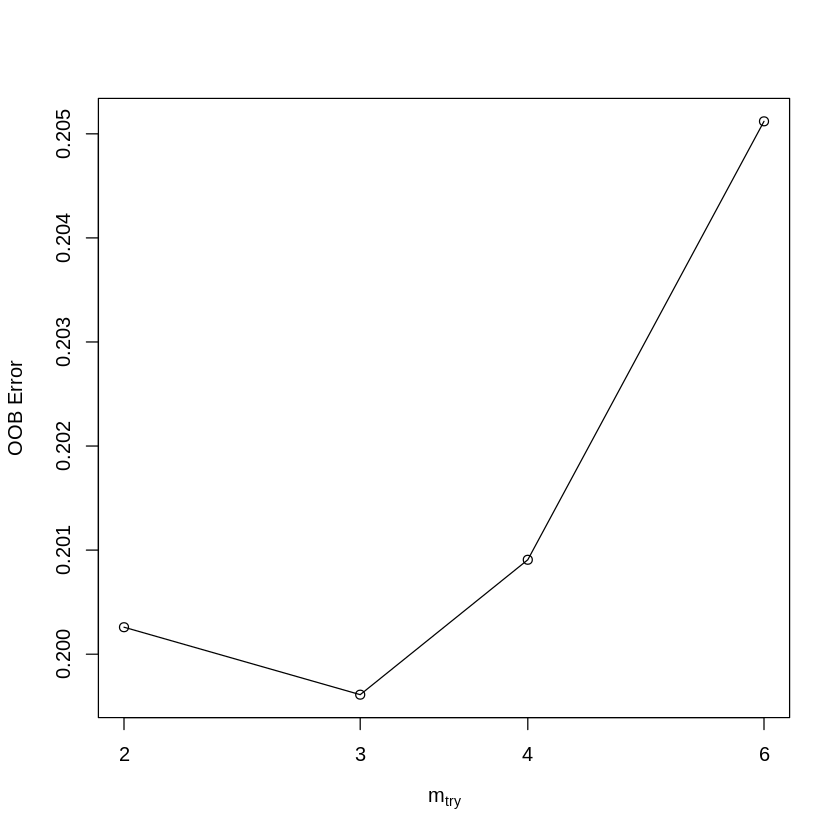

In [32]:
## get the features column in OFP_train
OFP_train_features<-OFP_train%>%
select(-hlth)

set.seed(22222)
# 
tune_mtry <- tuneRF(
  x          = OFP_train_features,
  y          = OFP_train$hlth,
  ntreeTry   = 600,
  mtryStart  = 4,
  stepFactor = 1.5,
  improve    = 0.001,
  trace      = FALSE    
)
